In [2]:
import pandas as pd
import os
import glob
import h5py
import numpy as np
import astropy.timeseries#.LombScargle
import matplotlib.pyplot as plt  

filename = '/Users/masatakaaizawa/research/current_research/TESS_Lc/debris_analysis/analysis/HD_name_sini_period.csv'
df = pd.read_csv(filename, header=None)
file=open(filename, "r")

def inc_extract(name, inc, disk_dic):
    inc_new = []
    disk_new = []
    name_new = []
    for (i, name) in enumerate(name_arr):
        if name in disk_dic:
            inc_new.append(inc[i])
            disk_new.append(disk_dic[name])
            name_new.append(name)
    return inc_new, disk_new, name_new
            

lines = file.readlines()
name_arr = []
gaia_rad_arr = []
vsini = []
P1_arr = []
sini_arr = []
inc_arr = []
disc_inc_dic = {}


solar_rad = 696340.0
day_s = 86400.0

flag = 0

for line in lines:
    itemList = line.split(",")

    try:
        disc_inc_dic[itemList[0]] = float(itemList[13])
    except:
        continue
        
for line in lines:
    itemList = line.split(",")
    if flag ==0:
        flag = 1
        continue
        
    try:
        rad_now = float(itemList[2])  * solar_rad
        vsin_now = float(itemList[7])
        period_now = day_s * float(itemList[9])
        v = 2 * np.pi* rad_now/period_now
        sini_now =vsin_now/ v
        if sini_now>1:
            inc_now = 90
        else:
            inc_now = np.arcsin(sini_now) * 180.0/np.pi
        sini_arr.append(sini_now)
        inc_arr.append(inc_now)
        name_arr.append(itemList[0])
        gaia_rad_arr.append( rad_now )
        P1_arr.append(period_now)
        print("OK")
    except:
        print("error")
        continue

        

OK
OK
error
OK
error
OK
error
error
error
error
OK
error
OK
error
OK
OK
OK
OK
error
error
error
error
error
error
error
error
error
OK
error
error
OK
OK
error
error
error
error
OK
OK
OK
error
error
OK
error
error
error
OK
error
OK
error
error
error
error
error
error
error
OK
error
OK
error
error
error
OK
error
OK
error
error
error
error
error
OK
OK
OK
error
OK
error
error
error
OK
OK
OK
OK
OK
error
error
OK
OK
error
OK
error
OK
error
error
error
error
error
error
OK
error
error
OK
error
OK
error
error
error
OK
OK
error
error
error
error
error
OK
error
error
error
error
error
OK
error
OK
error
error
error
error
error
error
error
error
error
error
OK
error
OK
OK
error
error
error
error
error


In [3]:
rad_now = 1.497  * solar_rad
vsin_now = 122.0 ##km/s
period = 2 * np.pi*rad_now /vsin_now
print(period/day_s)

0.6213687941552583


In [4]:
for i in range(len(name_arr)):
    print(name_arr[i], inc_arr[i], sini_arr[i], np.sin(0.25*np.pi))

HD 105 54.44985758592993 0.8136070043409047 0.7071067811865475
HD 166 66.97633665055356 0.9203434016820757 0.7071067811865475
HD 8907 48.12626931928938 0.7446176599428083 0.7071067811865475
HD 10647 39.30264152666225 0.6334165485707939 0.7071067811865475
HD 15115 90 1.1072370889940373 0.7071067811865475
HD 16743 90 1.089738724485286 0.7071067811865475
HD 17925 90 1.097839780152709 0.7071067811865475
HD 19994 17.247216584680658 0.29649517998428093 0.7071067811865475
HD 20320 90 1.0215400359835602 0.7071067811865475
HD 20807 11.574442558364504 0.20064095034610677 0.7071067811865475
HD 30495 51.88702956245016 0.7867953191667141 0.7071067811865475
HD 33636 28.362424399327086 0.47504721750539963 0.7071067811865475
HD 35650 90 1.0542406905226689 0.7071067811865475
HD 38678 32.134463332652224 0.5319080260289571 0.7071067811865475
HD 38858 5.633947808259585 0.09817255585359422 0.7071067811865475
HD 39060 1.4411804113703865 0.02515069099659118 0.7071067811865475
HD 48682 38.781563164024504 0.62

In [5]:
print(len(name_arr))

47


In [6]:
inc_now, disk_inc_now, name_now = inc_extract(name_arr, inc_arr, disc_inc_dic)

34

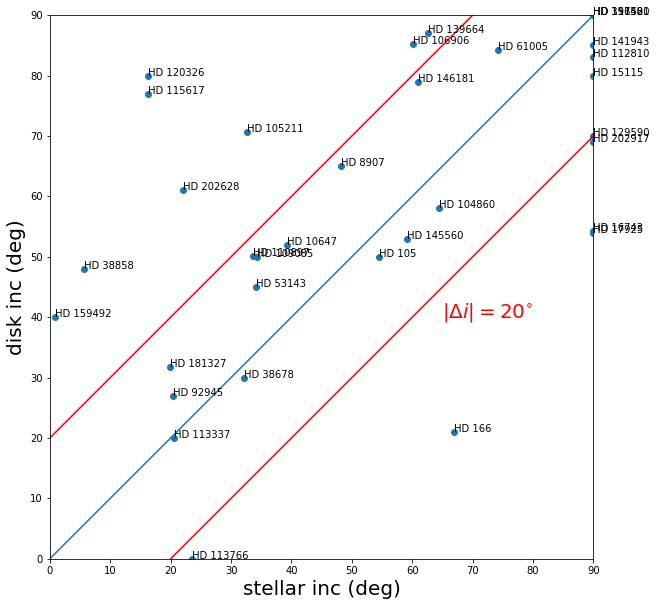

In [7]:
plt.figure(figsize=(10, 10)) 
plt.scatter(inc_now, disk_inc_now)

for i in range(len(name_now)):
    plt.text(inc_now[i], disk_inc_now[i], name_now[i])
    
plt.axes().set_aspect('equal')
plt.plot([0,90],[0,90])
plt.plot([20,110],[0,90],color="r")
plt.plot([0,90],[20,110],color="r")
plt.xlim(0,90)
plt.ylim(0,90)
plt.text(65, 40, "$|\Delta i|=20^{\circ}$", fontsize = 20, color ="r")
plt.xlabel("stellar inc (deg)", fontsize = 20)
plt.ylabel("disk inc (deg)", fontsize = 20)





len(inc_now)

In [10]:
import mcmc

cosi_star = np.cos(np.array(inc_now) *np.pi/180)
cosi_disk = np.cos(np.array(disk_inc_now)*np.pi/180)
cosi_star_err = 0.1 * np.ones(len(cosi_star))
cosi_disk_err = 0.1 * np.ones(len(cosi_star))
data = cosi_star, cosi_star_err, cosi_disk, cosi_disk_err


prob, kappa_arr = mcmc.kappa_dist(data, kappa_min=0.1)



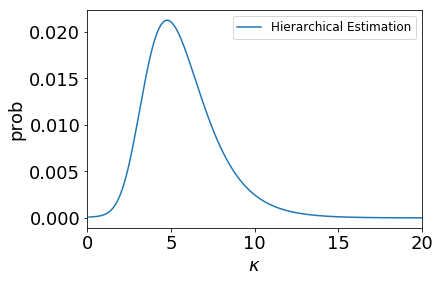

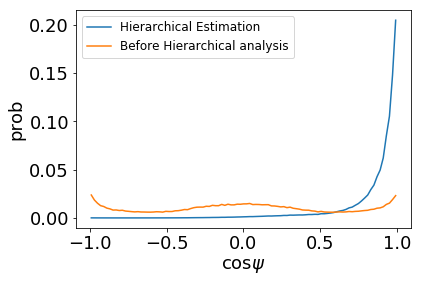

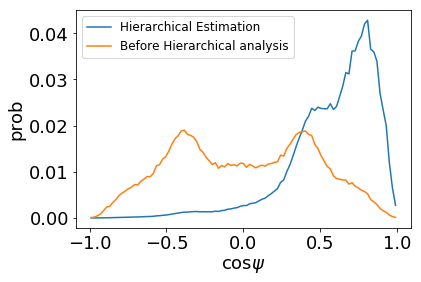

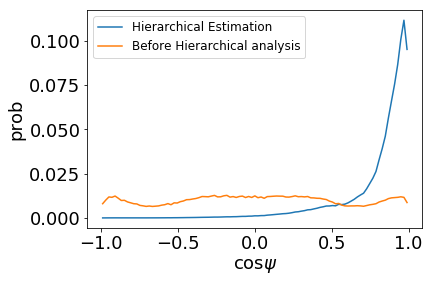

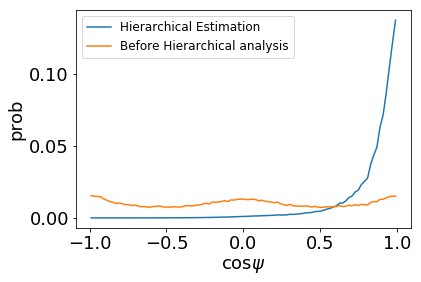

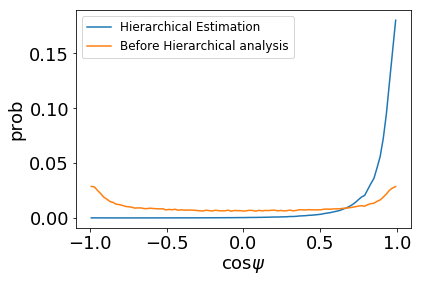

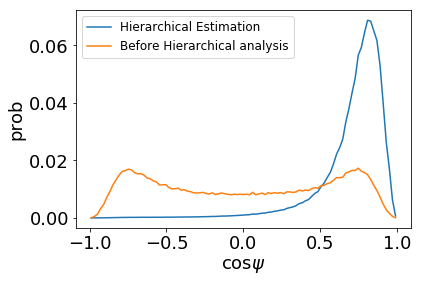

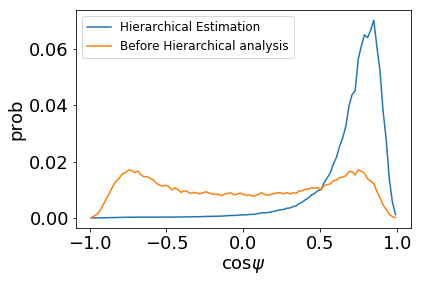

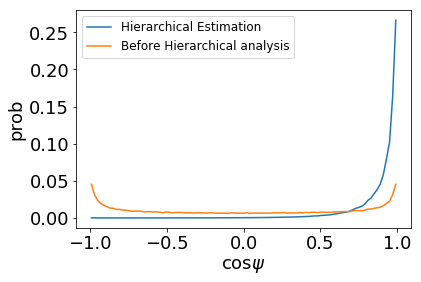

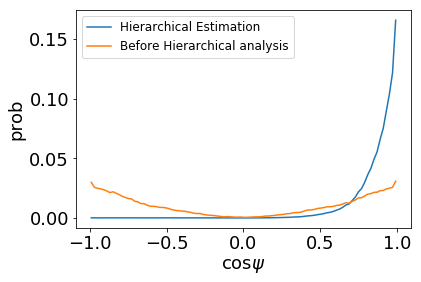

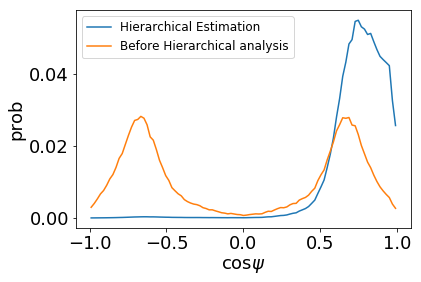

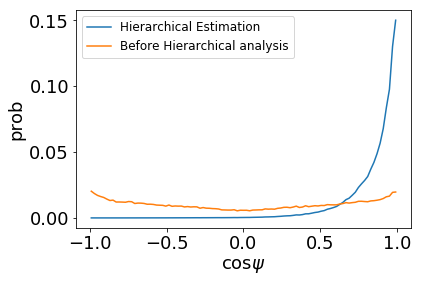

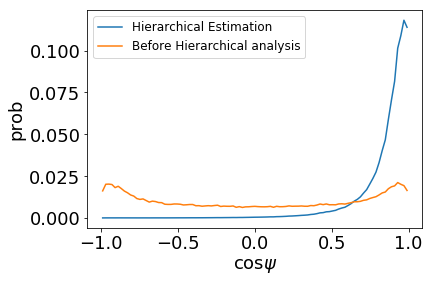

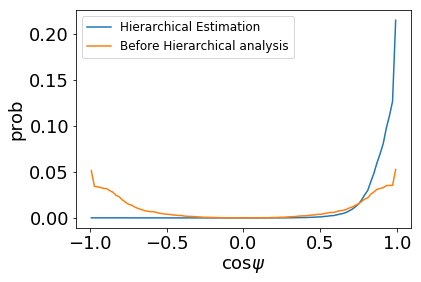

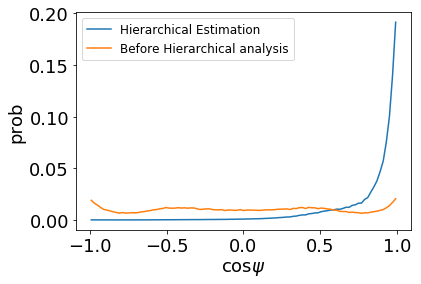

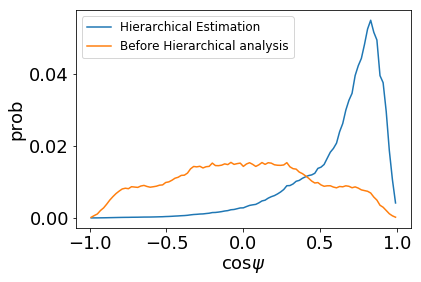

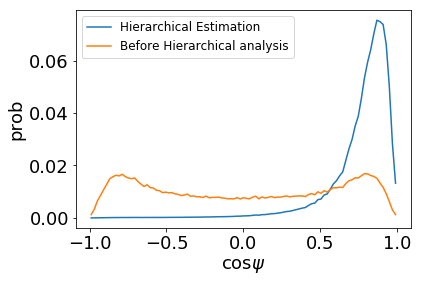

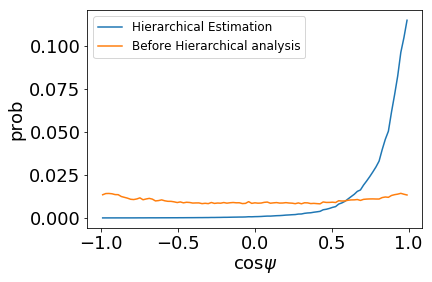

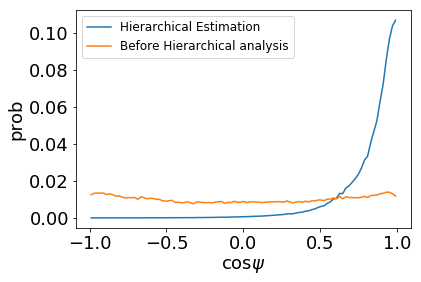

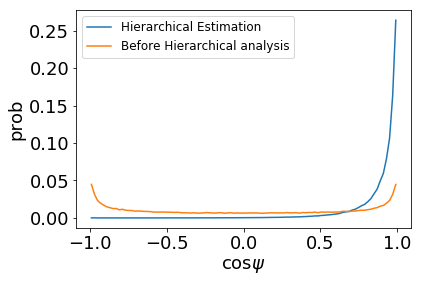

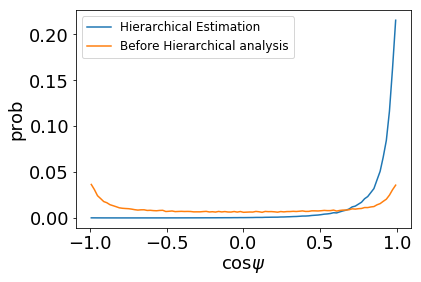

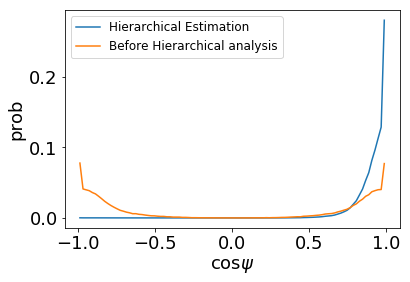

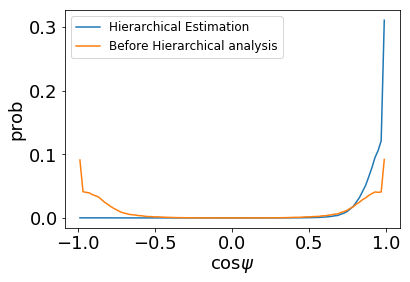

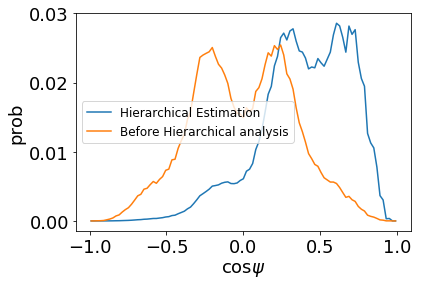

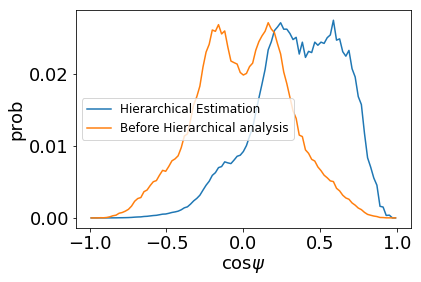

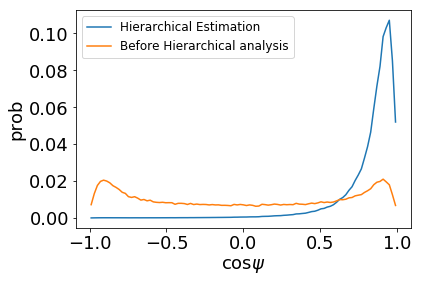

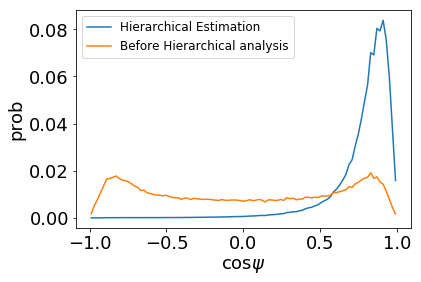

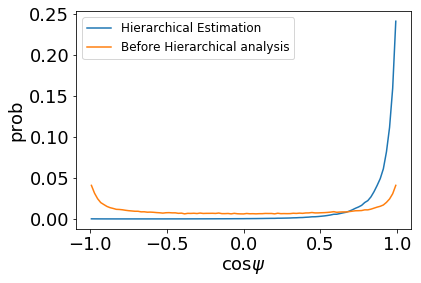

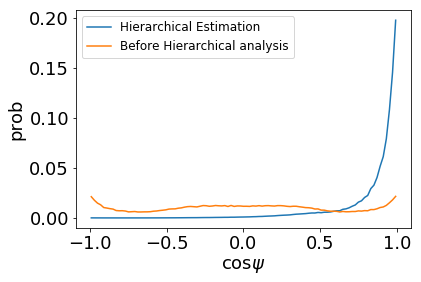

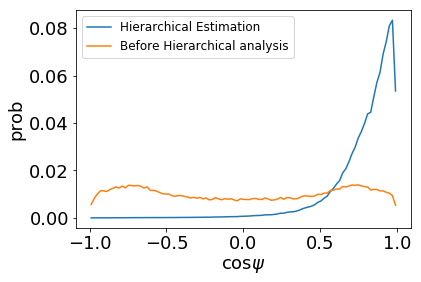

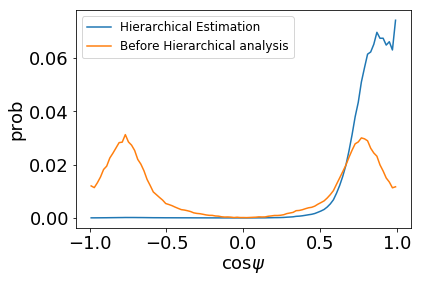

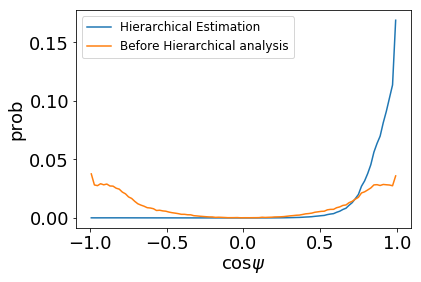

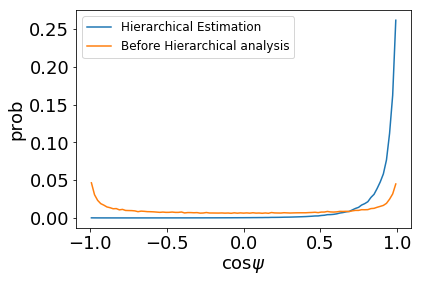

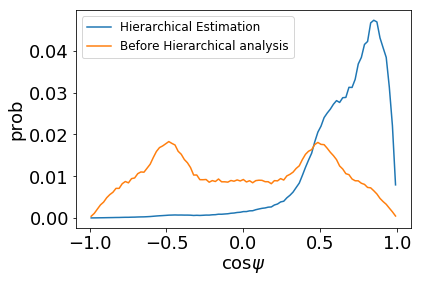

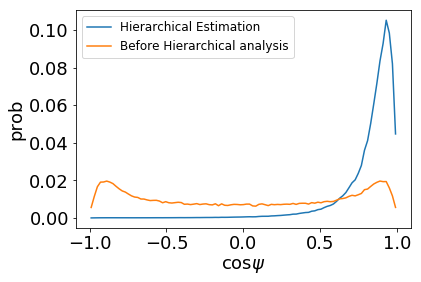

In [13]:
plt.rcParams["font.size"] = 18
plt.xlabel("$\kappa$")
plt.ylabel("prob")
plt.xlim(0,20)
#plt.plot([ kappa_now,  kappa_now], [0,np.max(prob/np.sum(prob))], label="Input")
plt.plot(kappa_arr, prob/np.sum(prob), label="Hierarchical Estimation" )
plt.legend(fontsize = 12)


plt.show()


for i_dmy in range(len(cosi_star)):
    data = cosi_star[i_dmy ], cosi_star_err[i_dmy ], cosi_disk[i_dmy ],cosi_disk_err[i_dmy ]
    psi_arr2, prob_2, prob_3 = mcmc.prob_improved(kappa_arr, prob, 1000, data)
    plt.plot(psi_arr2, prob_2/np.sum(prob_2), label="Hierarchical Estimation" )
    plt.plot(psi_arr2, prob_3/np.sum(prob_3), label="Before Hierarchical analysis" )
    #plt.plot([ psi_ang_arr[i_dmy],  psi_ang_arr[i_dmy]], [0,np.max(prob_2/np.sum(prob_2))], label="Input")
    plt.xlabel("$\cos \psi$")
    plt.ylabel("prob")
    plt.legend(fontsize = 12)
    plt.show()
    

In [16]:
def histogram_cos_psi(istar_arr, id_arr, PA_num = 1000):
    cos_psi_arr = []
    for i in range(len(istar_arr)):
        PA = np.linspace(0, 180, PA_num)
        cos_psi = np.sin(istar_arr[i]) * np.sin(id_arr[i]) * np.cos(PA) + np.cos(istar_arr[i]) * np.cos(id_arr[i])
        cos_psi_arr.append(cos_psi)
    return np.ravel(cos_psi_arr)

inc_now = np.array(inc_now)
disk_inc_now = np.array(disk_inc_now)

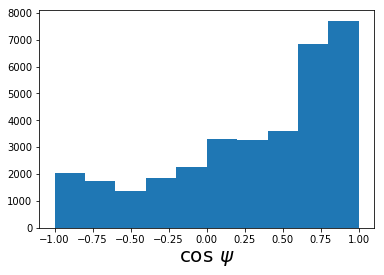

In [26]:
cosi_psi_arr = histogram_cos_psi(inc_now *np.pi/180, disk_inc_now*np.pi/180)
plt.hist(cosi_psi_arr)
plt.xlabel("cos $\psi$", fontsize = 20)


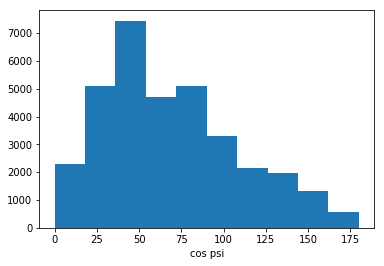

In [25]:
plt.hist(np.arccos(cosi_psi_arr) * 180/np.pi)
plt.xlabel("cos psi")

Power_divergenceResult(statistic=130.82554657797675, pvalue=0.01773753822054683)
Power_divergenceResult(statistic=89.15823283969212, pvalue=3.3956062410751765e-06)


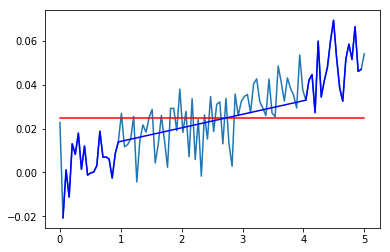

In [80]:
import scipy.stats as stats

x = np.linspace(0,5,100) ## 0-5までの実数 100点
sigma_0 = 0.01 ## 誤差の大きさ
y_obs = 0.01*x  + sigma_0* np.random.randn(100) ## 乱数　（分散σ0^2のガウシアンを足している)
plt.plot(x, y_obs) ##plot
y_model = np.mean(y) * np.ones(len(x)) ## np.onesは[1,1,....] の配列 長さはxと同じ
plt.plot(x, y_model, color="r")
sigma = np.ones(len(x))*  sigma_0
print(stats.chisquare(f_obs=y_obs/sigma, f_exp=y_model/sigma)) ## sigmaで割ってchi-squareの形にする
flag = (x <1) * (x>0) +  (x <5) * (x>4)  ## データを制限する
print(stats.chisquare(f_obs=y_obs[flag]/sigma[flag], f_exp=y_model[flag]/sigma[flag]))
plt.plot(x[flag], y_obs[flag], color="b")


